In [43]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# Reference DF with US Federal Information Processing Standard state code and name

state_fips_code = pd.read_csv("../data/FIPS_state_code_reference.csv")
state_fips_code.head()

,fips,state_code,state_name,gnis_id
0,1,AL,Alabama,1779775
1,2,AK,Alaska,1785533
2,4,AZ,Arizona,1779777
3,5,AR,Arkansas,68085
4,6,CA,California,1779778


In [53]:
# Proess user input state

selected_state = input("Please choose the state you are analyzing").title()
if ((selected_state == 'Hawaii') | (selected_state == 'Alaska')):
    print(f"Sorry. At the moment, We are not able to track weather data for the states Alaska and Hawaii. Enter any other US state")
index=state_fips_code.loc[state_fips_code['state_name'] == selected_state]

if ((selected_state != 'Hawaii') and (selected_state != 'Alaska')):
    if index.empty:
        print(f"No match for state {selected_state}. Please re-enter the state")
        selected_state =''
    else:
        print(f"Processing data for {selected_state}")

Please choose the state you are analyzing nevada


Processing data for Nevada


In [54]:
#  FIPS state codes are numeric and two-letter alphabetic codes defined in U.S. Federal Information Processing Standard Publication ("FIPS PUB") 5-2 to identify U.S. states.

temperature_rate = pd.read_csv("../data/model_state.csv")
temperature_rate.head()

,fips,Fall,Spring,Summer,Winter,max_warming_season,Annual,state_code,state_name,gnis_id
0,1,-0.195668,-0.105862,-0.325009,0.458526,Winter,-0.035048,AL,Alabama,1779775
1,4,1.203951,1.384480,1.274455,1.388388,Winter,1.319880,AZ,Arizona,1779777
2,5,-0.042540,0.266399,0.058596,0.532247,Winter,0.214074,AR,Arkansas,68085
3,6,1.570921,1.449242,1.478335,1.412430,Fall,1.480561,CA,California,1779778
4,8,1.055309,1.436910,1.367845,1.838758,Winter,1.438589,CO,Colorado,1779779


In [55]:
# This dataset presents the age-adjusted death rates for the 10 leading causes of death in the United States beginning in 1999. ICD (International Classification of Diseases)

mortality_rate = (pd.read_csv("../data/mortality_rate_by_US_state.csv")
                      .rename(columns={"Year":"year",
                                       '113 Cause Name': 'icd_cause_name',
                                      'Cause Name': 'cause_name',
                                      'State': 'state',
                                      'Deaths':'deaths',
                                      'Age-adjusted Death Rate':'age_adjusted_death_rate'}))
mortality_rate.head()

,year,icd_cause_name,cause_name,state,deaths,age_adjusted_death_rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0


In [56]:
# Load climate data by US State FIPS code along with the merged state name for the fips

climate_change = (pd.read_csv("../data/climdiv_state_year.csv")
                          .merge(state_fips_code)
                          .rename(columns = {'temp':'temparature_fahrenheit',
                                              'tempc':'temperature_celsius'}))
climate_change.head()

,fips,year,temparature_fahrenheit,temperature_celsius,state_code,state_name,gnis_id
0,1,1895,61.641667,16.467593,AL,Alabama,1779775
1,1,1896,64.266667,17.925926,AL,Alabama,1779775
2,1,1897,64.191667,17.884259,AL,Alabama,1779775
3,1,1898,62.983333,17.212963,AL,Alabama,1779775
4,1,1899,63.100000,17.277778,AL,Alabama,1779775


In [57]:
# Identify the mortality data by cause "cancer" to analyze the impact of temperature increase

cancer_rate_df = mortality_rate.loc[(mortality_rate["cause_name"]=="Cancer") & (mortality_rate["year"]>1999) & (mortality_rate["state"]==selected_state)]
cancer_rate_df

,year,icd_cause_name,cause_name,state,deaths,age_adjusted_death_rate
2427,2016,Malignant neoplasms (C00-C97),Cancer,Nevada,5214,157.3
2428,2015,Malignant neoplasms (C00-C97),Cancer,Nevada,5015,157.2
2429,2014,Malignant neoplasms (C00-C97),Cancer,Nevada,5015,164.5
2430,2013,Malignant neoplasms (C00-C97),Cancer,Nevada,4817,164.8
2431,2012,Malignant neoplasms (C00-C97),Cancer,Nevada,4610,163.6
2432,2011,Malignant neoplasms (C00-C97),Cancer,Nevada,4606,170.2
2433,2010,Malignant neoplasms (C00-C97),Cancer,Nevada,4529,174.2
2434,2009,Malignant neoplasms (C00-C97),Cancer,Nevada,4461,175.3
2435,2008,Malignant neoplasms (C00-C97),Cancer,Nevada,4404,179.4
2436,2007,Malignant neoplasms (C00-C97),Cancer,Nevada,4331,180.8


In [58]:
# Climate change data from year 2000 for the selected state.

climate_df =climate_change.loc[(climate_change["year"]>1999) & (climate_change["year"]<2017) & (climate_change["state_name"]==selected_state)]
climate_df

,fips,year,temparature_fahrenheit,temperature_celsius,state_code,state_name,gnis_id
3230,32,2000,51.483333,10.824074,NV,Nevada,1779793
3231,32,2001,51.558333,10.865741,NV,Nevada,1779793
3232,32,2002,50.800000,10.444444,NV,Nevada,1779793
3233,32,2003,52.241667,11.245370,NV,Nevada,1779793
3234,32,2004,50.833333,10.462963,NV,Nevada,1779793
3235,32,2005,50.666667,10.370370,NV,Nevada,1779793
3236,32,2006,50.791667,10.439815,NV,Nevada,1779793
3237,32,2007,51.525000,10.847222,NV,Nevada,1779793
3238,32,2008,50.416667,10.231481,NV,Nevada,1779793
3239,32,2009,50.366667,10.203704,NV,Nevada,1779793


In [59]:
# Calculation of key performance indicators

whole_data = cancer_rate_df.merge(climate_df , how= 'outer', on="year" )
yearly_cancer= whole_data.groupby(whole_data["year"]).sum(["deaths"])
temperature_yearly = whole_data.groupby(whole_data["year"]).mean(["temperature_celsius"])
yearly_cancer_deaths= yearly_cancer[["deaths"]]
temperature_yearly_change = temperature_yearly[["temperature_celsius"]]
annual_change = temperature_yearly_change.merge(yearly_cancer_deaths, on="year")
annual_change

,temperature_celsius,deaths
year,,
2000,10.824074,3763
2001,10.865741,3815
2002,10.444444,3937
2003,11.245370,4138
2004,10.462963,4119
2005,10.370370,4238
2006,10.439815,4226
2007,10.847222,4331
2008,10.231481,4404


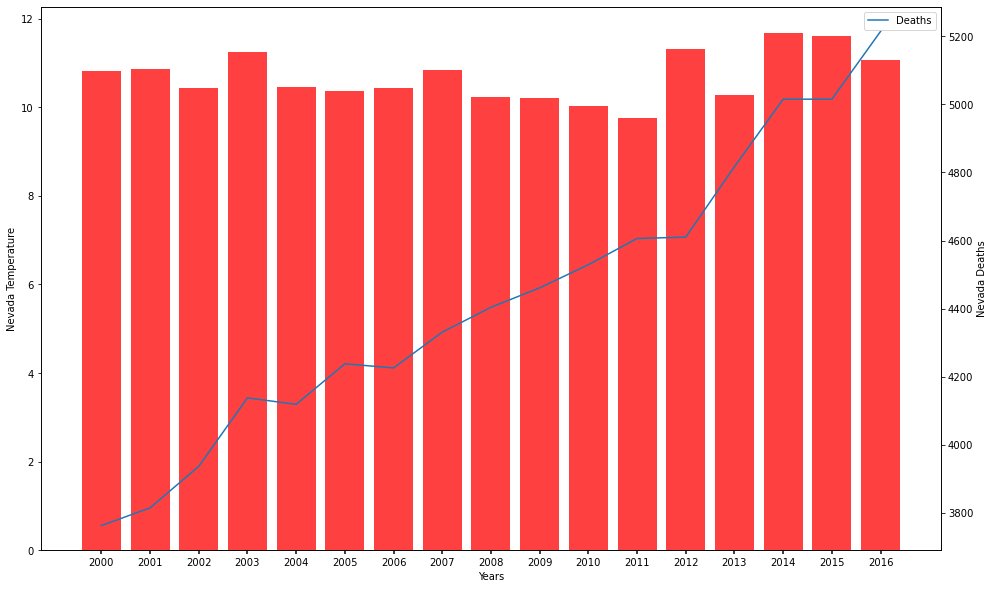

In [60]:
# plot the graphs to indicate the impact of climate change on human deaths due to cancer

fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)
fig.set_figheight(10)
fig.set_figwidth(20)
twin1 = ax.twinx()

ax.bar(annual_change.index, annual_change["temperature_celsius"], color="r", label="Temperature",alpha=0.75, tick_label = annual_change.index)

twin1.plot(annual_change.index, annual_change["deaths"], label="Deaths")

ylabel = f"{selected_state} Temperature"
twin_ylabel = f"{selected_state} Deaths"
ax.set_xlabel("Years")
ax.set_ylabel(ylabel)
twin1.set_ylabel(twin_ylabel)

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='x', **tkw)

filename=f"../images/{selected_state}.png"
plt.savefig(filename)
# plt.grid()
plt.legend()
plt.show()